In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/home/dodge/.local/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
import os
os.chdir("/home/dodge/workspace/twits")

from src import featurize
from twits.src import core
from twits.src import process

print "Done."

Done.


In [12]:
df = core.read_csv("./data/processed_small_test_sample.csv")

X_train = core.read_csv("./data/processed_small_test_sample.csv")
y_train = core.read_csv("./data/processed_small_test_sample.csv")
X_test = core.read_csv("./data/processed_small_test_sample.csv")
y_test = core.read_csv("./data/processed_small_test_sample.csv")

print "done"

Time to read: 1.35 seconds
Time to read: 0.96 seconds
Time to read: 0.96 seconds
Time to read: 0.97 seconds
Time to read: 0.97 seconds
done


[(0, 0.040000000000000001), (-5, 150)]

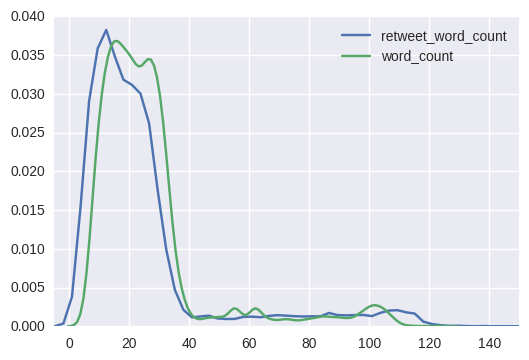

In [13]:
sns.kdeplot(df.retweet_word_count.dropna())
plot = sns.kdeplot(df.word_count.dropna())

plot.set(ylim=(0, None), xlim=(-5,150))

[(0, 1.2000000000000002), (0, 5)]

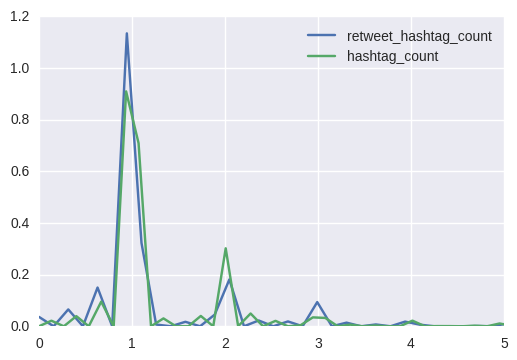

In [14]:
sns.kdeplot(df.retweet_hashtag_count.dropna())
plot = sns.kdeplot(df.hashtag_count.dropna())

plot.set(ylim=(0, None), xlim=(0,5))

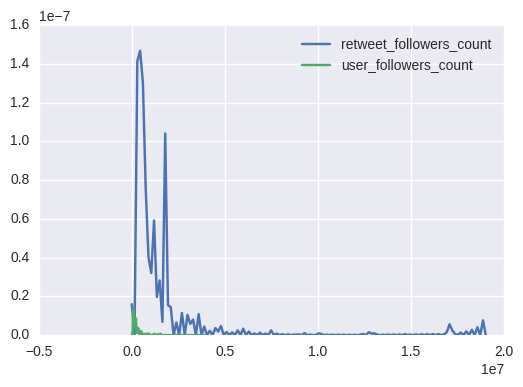

In [28]:
sns.kdeplot(df.retweet_followers_count.dropna())
plot = sns.kdeplot(df.user_followers_count.dropna())

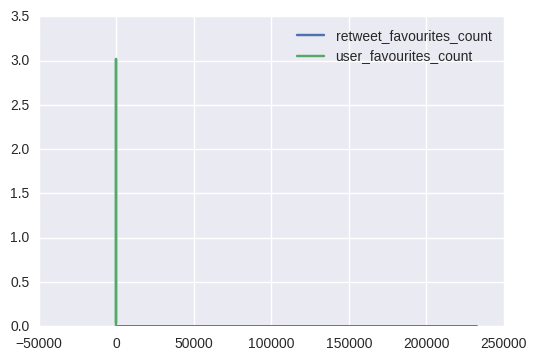

In [46]:
sns.kdeplot(df.retweet_favourites_count.dropna())
plot = sns.kdeplot(df.user_favourites_count.dropna())

[(0, 0.00030000000000000003), (-5, 150)]

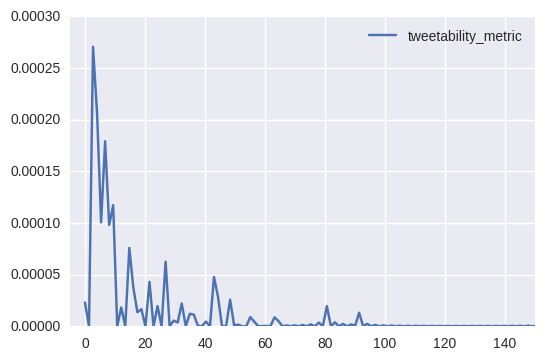

In [15]:
plot = sns.kdeplot(df.tweetability_metric.dropna())
plot.set(ylim=(0, None), xlim=(-5,150))

/home/dodge/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dodge/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


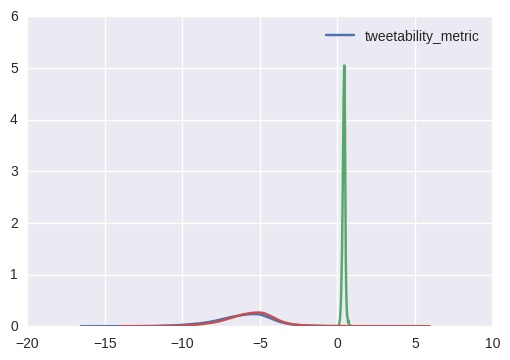

In [61]:
import scipy
import numpy as np

logged = np.log(df.tweetability_metric)
sns.kdeplot(logged)

boxcoxed = scipy.stats.boxcox(df.tweetability_metric.as_matrix())[0]
sns.kdeplot(boxcoxed)

/home/dodge/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dodge/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


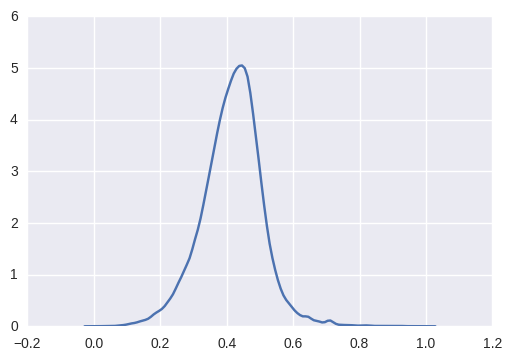

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(boxcoxed)

plot = sns.kdeplot(rescaled)

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

target = df.tweetability_metric.copy()

scaler = MinMaxScaler(feature_range=(0,1))

scaled_tweetability = scaler.fit_transform(pd.Series(target))

target_classified = KMeans(n_clusters=3, random_state=0).fit_predict(
    scaled_tweetability.reshape(-1, 1))

/home/dodge/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dodge/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


[(0, 6.0), (0, 5)]

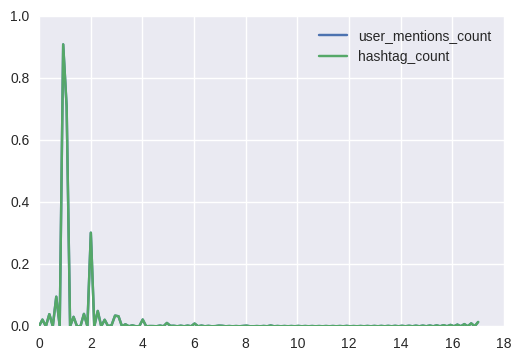

In [58]:
sns.kdeplot(df.user_mentions_count.dropna())
sns.kdeplot(df.hashtag_count.dropna())

plot.set(ylim=(0, None), xlim=(0,5))

NameError: name 'dfn' is not defined

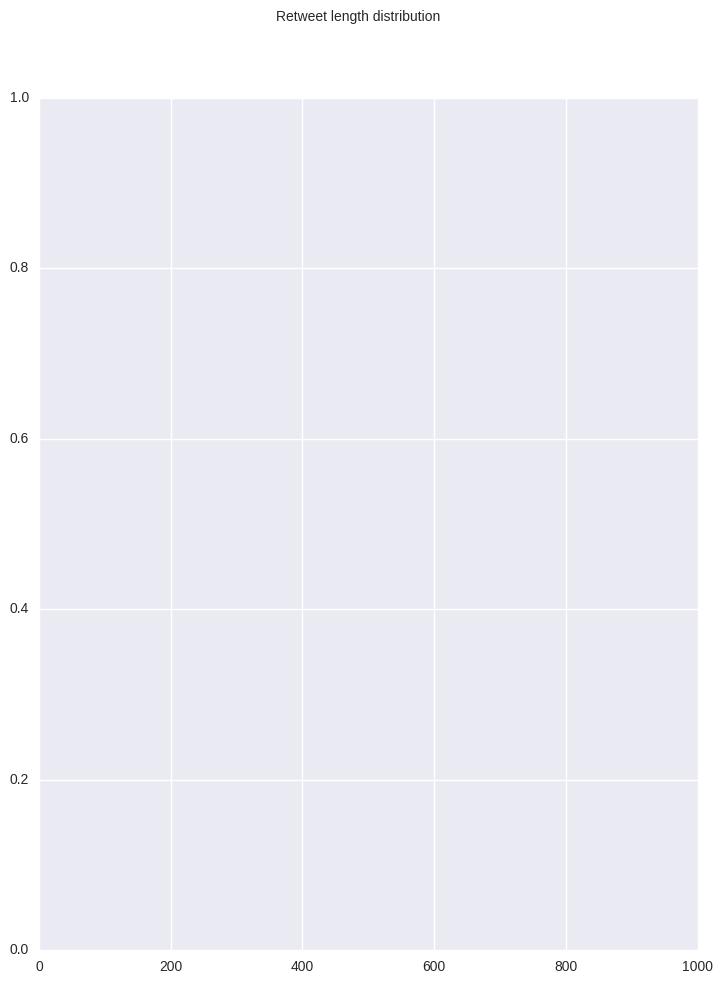

In [59]:
fig = plt.figure(1, figsize = (8.5,11))
fig.suptitle('Retweet length distribution')
plt.xlim((0,1000))
plt.hist(dfn[dfn.retweet_count > 100].retweet_count.values, bins=200)
plt.show()